# EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Load Data

In [2]:
train = pd.read_csv("train.csv",index_col = "Id")
print(train.shape)
print(train.columns)

(1460, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

In [3]:
train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
720,20,RL,69.0,9920,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1969,1969,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,523,Unf,0,448,971,GasA,TA,Y,SBrkr,971,0,0,971,0,0,1,1,3,1,TA,5,Typ,1,Po,Attchd,1969.0,Unf,1,300,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,128500
348,20,RL,NaN,17600,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,30.0,TA,TA,CBlock,TA,TA,No,BLQ,1270,Unf,0,208,1478,GasA,Ex,Y,FuseA,1478,0,0,1478,1,0,2,0,3,1,TA,6,Typ,2,Gd,Attchd,1960.0,Unf,2,498,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,157500
1356,80,RL,102.0,10192,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,6,1968,1992,Gable,CompShg,MetalSd,MetalSd,BrkFace,143.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,570,570,GasA,Gd,Y,SBrkr,1222,698,0,1920,0,0,3,0,4,1,Gd,8,Typ,1,TA,Attchd,1968.0,RFn,2,487,TA,TA,Y,0,98,0,0,0,0,NaN,GdPrv,NaN,0,9,2006,WD,Normal,170000
803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,WdShing,Wd Shng,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,648,Unf,0,80,728,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,410,TA,TA,Y,36,18,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
1065,20,RL,NaN,11000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1966,1966,Gable,CompShg,Plywood,Plywood,BrkFace,200.0,TA,TA,CBlock,TA,TA,Mn,BLQ,740,Rec,230,184,1154,GasA,Ex,Y,SBrkr,1154,0,0,1154,0,0,1,1,3,1,TA,6,Typ,1,Po,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,58,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,154000
1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,NaN,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
966,60,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,783,783,GasA,Ex,Y,SBrkr,783,701,0,1484,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,2,393,TA,TA,Y,0,72,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,178900
665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,Y,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005.0,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000


## Target Variable: Sale Price

Text(0.5, 1.0, 'Density plot Logged Sale Price')

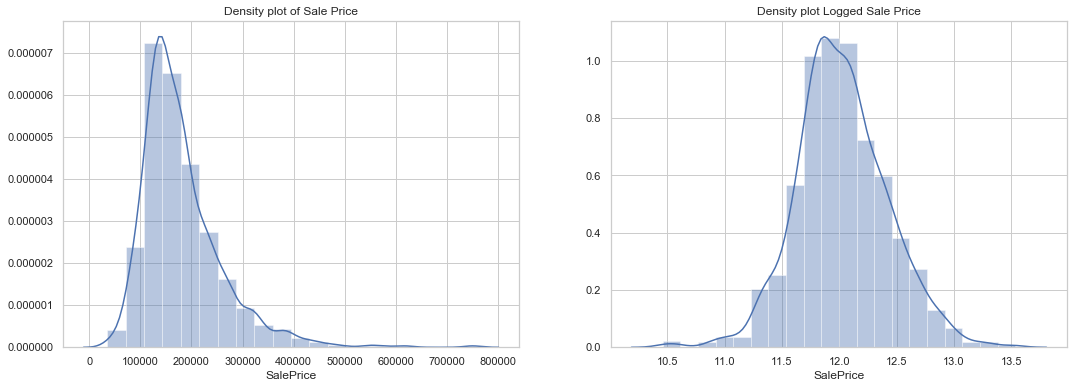

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(train["SalePrice"],bins=20, ax= ax[0])
ax[0].set_title("Density plot of Sale Price")

# To make the distribution of the target variable normal, I applied the log transformation.
lsalesprice = train["SalePrice"].apply(np.log)
sns.distplot(lsalesprice, bins = 20, ax= ax[1])
ax[1].set_title("Density plot Logged Sale Price")

## 10 critical factors in house value based upon research

* Peer-reviewed scholarly journal: https://link.springer.com/article/10.1007/s11146-006-9983-5<br>
* Opendoor blog post: https://www.opendoor.com/w/blog/factors-that-influence-home-value 


The Below are the lists of features related to each of the critical factors 

* Sq-Foot : BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF WoodDeckSF OpenPorchSF GrLivArea EnclosedPorch 3SsnPorch ScreenPorch MasVnrArea
* Lot Size: LotFrontage LotArea LotShape LotConfig
* Age: YearBuilt YrSold
* Bed and Bathroom: BedroomAbvGr BsmtFullBath BsmtHalfBath FullBath HalfBath TotRmsAbvGrd
* Garage: GarageType GarageFinish GarageYrBlt GarageCars GarageArea GarageQual GarageCond
* Pools: PoolArea PoolQC
* Fireplace: Fireplaces FireplaceQu
* Air-conditioning: CentralAir
* Upgrades/updates: YearRemodAdd
* Neighborhood/Location: Neighborhood

In [5]:
# Important features included in 10 most critical factors listed above
imp_cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","WoodDeckSF",
            "OpenPorchSF","GrLivArea","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea","LotFrontage",
            "LotArea","LotShape","LotConfig","YearBuilt","YrSold","BedroomAbvGr","BsmtFullBath","BsmtHalfBath",
            "FullBath","HalfBath","TotRmsAbvGrd","GarageType","GarageFinish","GarageYrBlt","GarageCars","GarageArea",
            "GarageQual","GarageCond","PoolArea","PoolQC","Fireplaces","FireplaceQu","CentralAir","YearRemodAdd",
            "Neighborhood"]

In [6]:
# Descriptive Statistics of the numerical features from the list of critical factors
train[imp_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GrLivArea,EnclosedPorch,3SsnPorch,ScreenPorch,MasVnrArea,LotFrontage,LotArea,YearBuilt,YrSold,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,PoolArea,Fireplaces,YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,94.244521,46.660274,1515.463699,21.954110,3.409589,15.060959,103.685262,70.049958,10516.828082,1971.267808,2007.815753,2.866438,0.425342,0.057534,1.565068,0.382877,6.517808,1978.506164,1.767123,472.980137,2.758904,0.613014,1984.865753
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,125.338794,66.256028,525.480383,61.119149,29.317331,55.757415,181.066207,24.284752,9981.264932,30.202904,1.328095,0.815778,0.518911,0.238753,0.550916,0.502885,1.625393,24.689725,0.747315,213.804841,40.177307,0.644666,20.645407
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,1872.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,0.000000,59.000000,7553.500000,1954.000000,2007.000000,2.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,1967.000000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,0.000000,25.000000,1464.000000,0.000000,0.000000,0.000000,0.000000,69.000000,9478.500000,1973.000000,2008.000000,3.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1980.000000,2.000000,480.000000,0.000000,1.000000,1994.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,168.000000,68.000000,1776.750000,0.000000,0.000000,0.000000,166.000000,80.000000,11601.500000,2000.000000,2009.000000,3.000000,1.000000,0.000000,2.000000,1.000000,7.000000,2002.000000,2.000000,576.000000,0.000000,1.000000,2004.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,857.000000,547.000000,5642.000000,552.000000,508.000000,480.000000,1600.000000,313.000000,215245.000000,2010.000000,2010.000000,8.000000,3.000000,2.000000,3.000000,2.000000,14.000000,2010.000000,4.000000,1418.000000,738.000000,3.000000,2010.000000


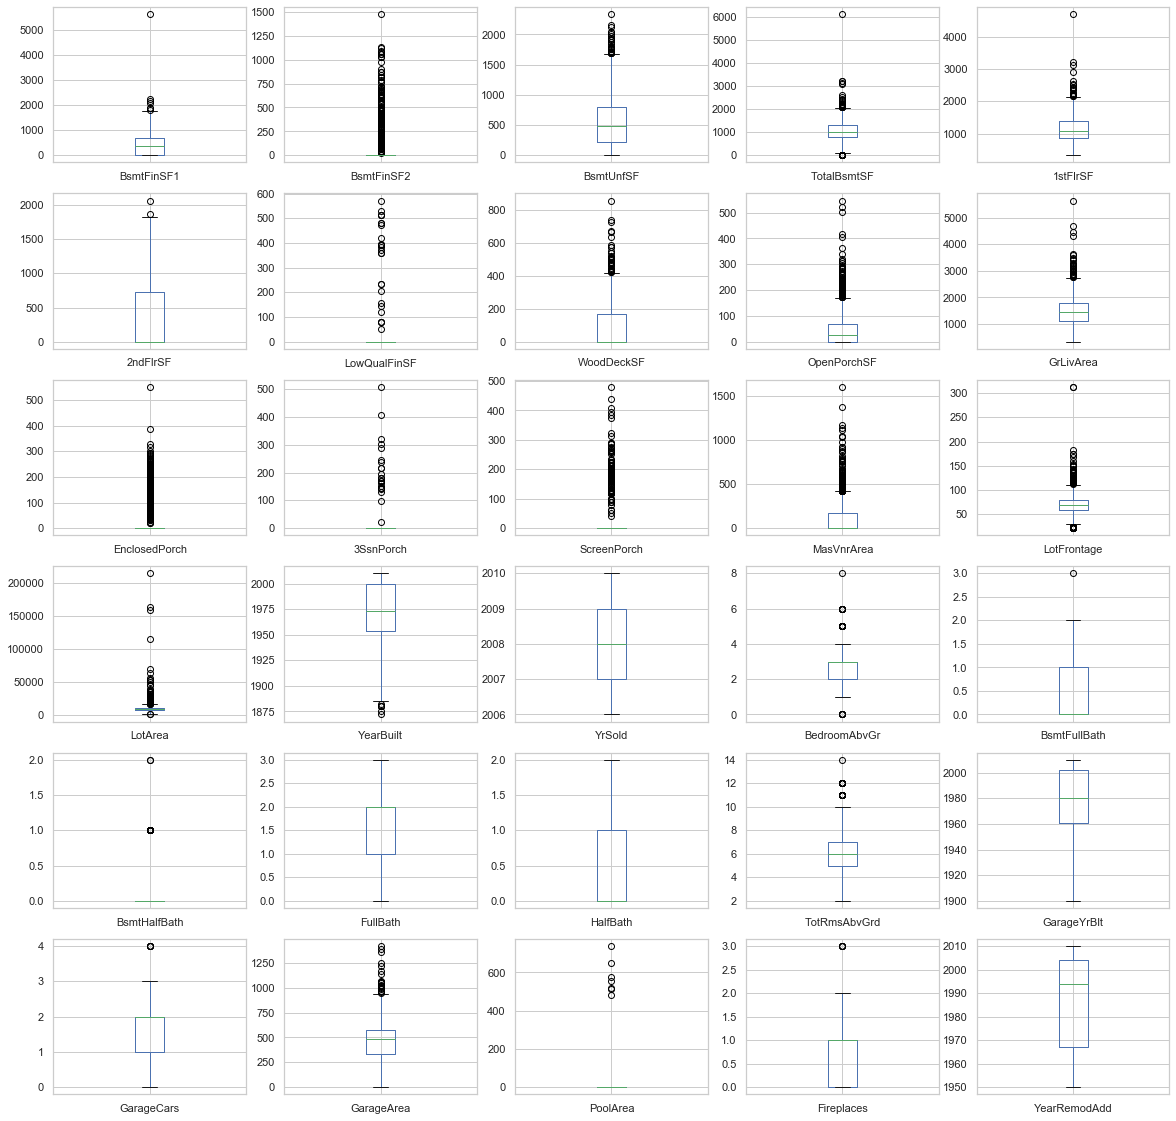

In [7]:
# Boxplots of the numerical features from the list of critical factors
train[imp_cols].plot(kind = "box", subplots = True, sharex = False, sharey = False, layout = (6,5), figsize=(20,20));

In [8]:
# Categorical features among the critical Factors 
cat_imp_cols = train[imp_cols].select_dtypes("object").columns.tolist()
cat_imp_cols

['LotShape',
 'LotConfig',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'FireplaceQu',
 'CentralAir',
 'Neighborhood']

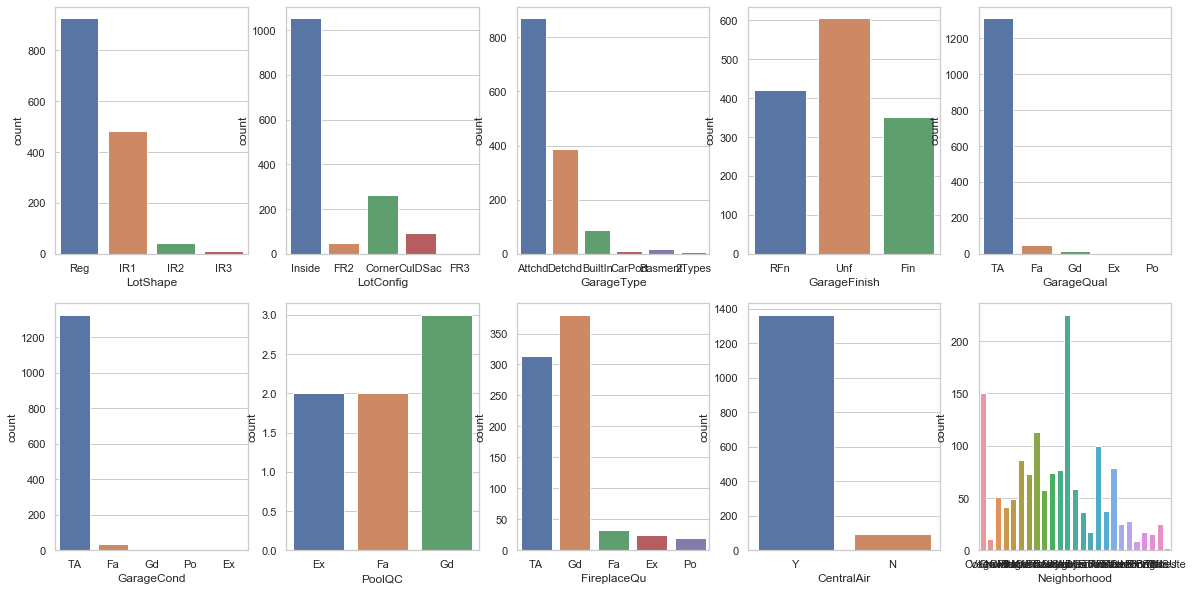

In [9]:
# Countplots of the categorical features from the list of critical factors
fig,((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (20,10))
sns.countplot(data = train, x = "LotShape", ax = ax1);
sns.countplot(data = train, x = "LotConfig", ax = ax2);
sns.countplot(data = train, x = "GarageType", ax = ax3);
sns.countplot(data = train, x = "GarageFinish", ax = ax4);
sns.countplot(data = train, x = "GarageQual", ax = ax5);
sns.countplot(data = train, x = "GarageCond", ax = ax6);
sns.countplot(data = train, x = "PoolQC", ax = ax7);
sns.countplot(data = train, x = "FireplaceQu", ax = ax8);
sns.countplot(data = train, x = "CentralAir", ax = ax9);
sns.countplot(data = train, x = "Neighborhood", ax = ax10);

In [10]:
# Features that are not included in the 10 most critical factors
unimp_cols = [col for col in train.columns.tolist() if col not in imp_cols]
unimp_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

## Features with high correlation

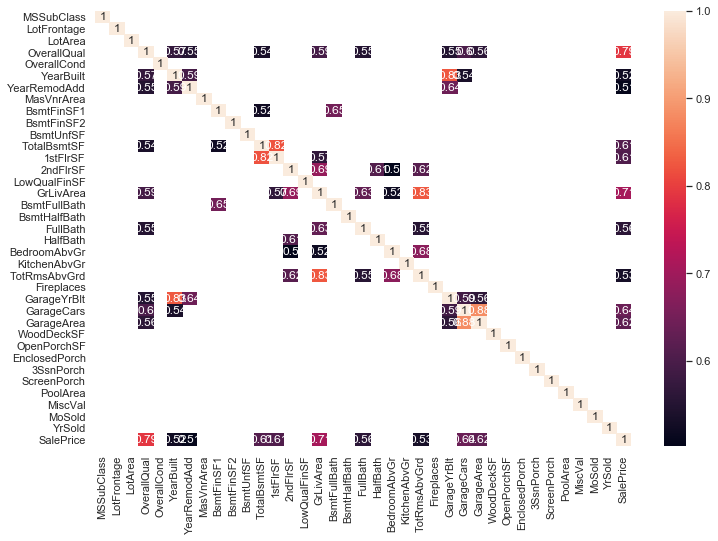

In [11]:
corr = train.corr()
sns.heatmap(corr[(corr > 0.5) | (corr < -0.5)], annot = True);

### Examine some of the features that are highly correlated with SalePrice

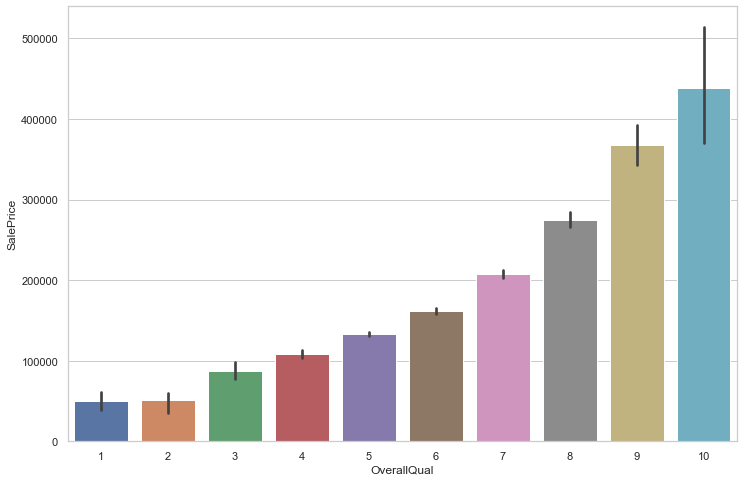

In [12]:
sns.barplot(data = train, x = "OverallQual", y = "SalePrice");

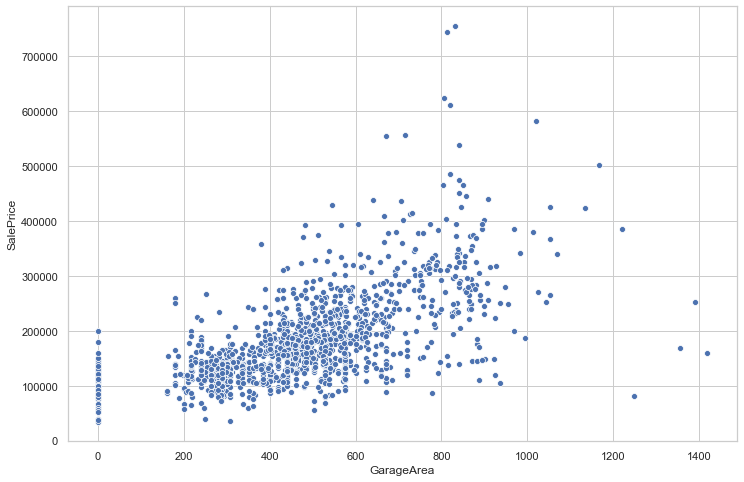

In [13]:
sns.scatterplot(data = train, x = "GarageArea", y = "SalePrice");

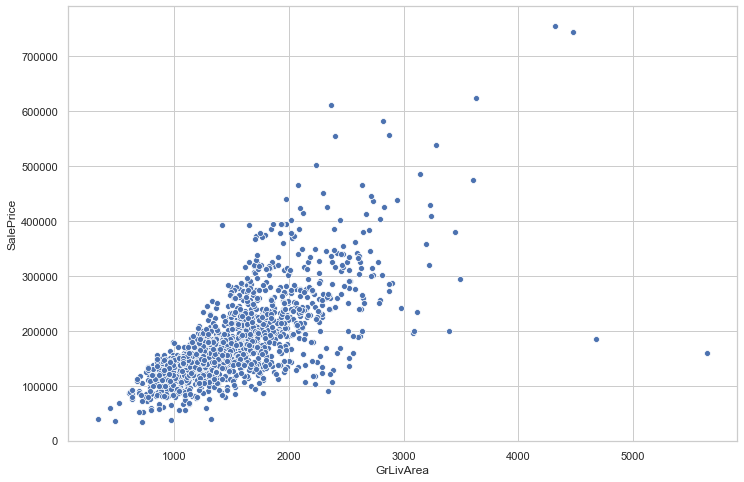

In [14]:
sns.scatterplot(data = train, x = "GrLivArea", y = "SalePrice");

### Count of missing values, which will be imputed in the feature engineering process

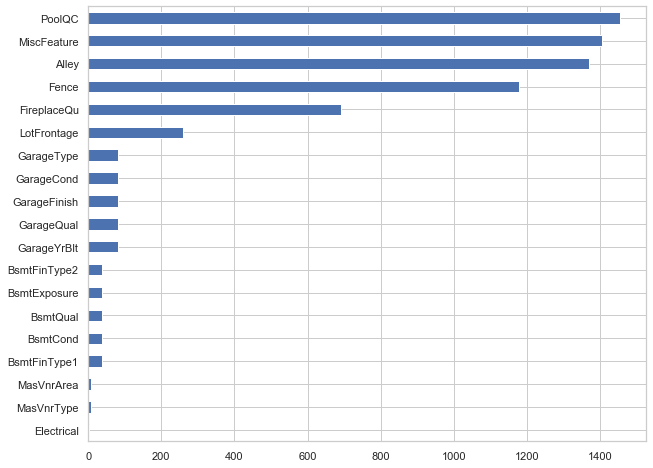

In [15]:
missing = pd.DataFrame(train.isna().sum().sort_values(), columns = ["Count_NaN"])
missing[missing["Count_NaN"] > 0].plot(kind= 'barh', figsize=(10,8),legend = None);